In [1]:
# --print header--
print('\nCorrina Del Greco, Dec 2020')
print('Benford\'s Law and the 2020 Election')
print('\nThis lesson is based on YouTuber Stand-up Math\'s video "Why do Biden\'s votes not follow Benford\'s Law?"')
# https://www.youtube.com/watch?v=etx0k1nLn78&feature=youtu.be
print('\nThe reason for solving this problem: There are a lot of "backed up" claims that we are expected to trust because data is presented. '
      + 'This video disproves one of those claims, but in doing do, it itself is one. '
      + 'The moral of the story is to verify, double check, and see for yourself. It is an integral part of data science.')
print('\nThe two sentence summary: An exploration of Benford\'s Law as applied to Joe Biden and Donald Trump\'s votes in the precincts of Chicago. Deeper anaylsis reveals interesting results.\n')


Corrina Del Greco, Dec 2020
Benford's Law and the 2020 Election

This lesson is based on YouTuber Stand-up Math's video "Why do Biden's votes not follow Benford's Law?"

The reason for solving this problem: There are a lot of "backed up" claims that we are expected to trust because data is presented. This video disproves one of those claims, but in doing do, it itself is one. The moral of the story is to verify, double check, and see for yourself. It is an integral part of data science.

The two sentence summary: An exploration of Benford's Law as applied to Joe Biden and Donald Trump's votes in the precincts of Chicago. Deeper anaylsis reveals interesting results.



In [2]:
# --import libraries--
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [3]:
# --set path to project files--
print('\nChange the path in this cell to where the project files were downloaded on your machine.')
my_folder = "c:\\Users\\Corrina Del Greco\\Documents\\ERAU\\MA305\\My Work\\Project\\"
print('You\'re telling me that the files are at: ' + my_folder + '\n')


Change the path in this cell to where the project files were downloaded on your machine.
You're telling me that the files are at: c:\Users\Corrina Del Greco\Documents\ERAU\MA305\My Work\Project\



In [4]:
# --check if benford djstribution file exists--
bd_local_csv_filename = my_folder + "benforddist.csv"
my_file = Path(bd_local_csv_filename)
if my_file.exists() == False:
    print('\nFile does not exist: ' + bd_local_csv_filename)
    print('Check and rerun the cell that sets that path before continuing.\n')
    exit()


So what is Benford's law?
Benford's law is a statement that if you get a large range of data from the "real world" and you look at the lead digit of each of the values, if you count up how many are ones, how many are twos, and so on, you get way more ones than anything else.
Important to note: Benford's Law applies only when the data spans multiple magnitudes. More on this later.

Benford Distribution:
    Digit  Proportion
0      1        30.1
1      2        17.6
2      3        12.5
3      4         9.7
4      5         7.9
5      6         6.7
6      7         5.8
7      8         5.1
8      9         4.6 



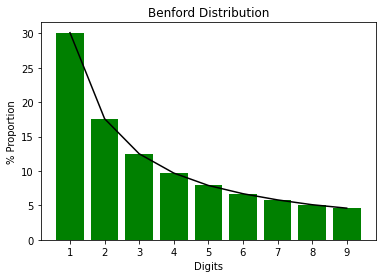

The discussion is about a) Benford's law being used for detecting election fraud, and b) Joe Biden's vote totals not matching Benford's Law (where Donald Trump's vote totals do). To explore this, we first need data.



In [5]:
# --load benford distribution file--
df_bd = pd.read_csv(bd_local_csv_filename)

print('\nSo what is Benford\'s law?')
print('Benford\'s law is a statement that if you get a large range of data from the "real world" '
      + 'and you look at the lead digit of each of the values, if you count up '
      + 'how many are ones, how many are twos, and so on, you get '
      + 'way more ones than anything else.')
print('Important to note: Benford\'s Law applies only when the data spans multiple magnitudes. More on this later.')

# --plot benford distribution--
print('\nBenford Distribution:\n', df_bd, '\n')
plt.bar(df_bd['Digit'],df_bd['Proportion'], color='green')
plt.plot(df_bd['Digit'],df_bd['Proportion'], color='black')
plt.title("Benford Distribution")
plt.xlabel("Digits")
plt.ylabel("% Proportion")
plt.xticks(df_bd['Digit'])
plt.show()

print('The discussion is about a) Benford\'s law being used for detecting election fraud, and '
      + 'b) Joe Biden\'s vote totals not matching Benford\'s Law (where Donald Trump\'s vote totals do). '
      + 'To explore this, we first need data.\n')

In [6]:
# --set variables based on data file--
print('\nElection data for Chicago\'s 2069 precincts is publicly available online.')
# https://chicagoelections.gov/en/election-results-specifics.asp
print('I\'ve downloaded the data and converted it to a csv containing only columns relevant to our experiment:')
print('   Total votes, votes for Biden, and votes for Trump')
print('If you want to do this yourself, change the values in this cell to match your file.\n')

local_csv_filename = my_folder + "mydataexport.csv" # csv file name
v_column = 'Votes'                                  # column header for total votes
d_column = 'Joseph R. Biden & Kamala D. Harris'     # column header for democrat votes
r_column = 'Donald J. Trump & Michael R. Pence'     # column header for republican votes


Election data for Chicago's 2069 precincts is publicly available online.
I've downloaded the data and converted it to a csv containing only columns relevant to our experiment:
   Total votes, votes for Biden, and votes for Trump
If you want to do this yourself, change the values in this cell to match your file.



In [7]:
# --check if data file exists--
my_file = Path(local_csv_filename)
if my_file.exists() == False:
    print('\nFile does not exist: ' + local_csv_filename)
    print('Check and rerun cells that set that path before continuing.\n')
    exit()

In [8]:
# --load the dataset--
df = pd.read_csv(local_csv_filename)
print('\nChicago dataset loaded:\n')
df.info()
print()


Chicago dataset loaded:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Votes                               2069 non-null   int64
 1   Joseph R. Biden & Kamala D. Harris  2069 non-null   int64
 2   Donald J. Trump & Michael R. Pence  2069 non-null   int64
dtypes: int64(3)
memory usage: 48.6 KB



In [9]:
# --define helper functions--
def first_digit(n):
    while (n >= 10):
        n /= 10
    return int(n)

def last_digit(n):
    return n % 10

def last_two_digits(n):
    return np.abs(n) % 100

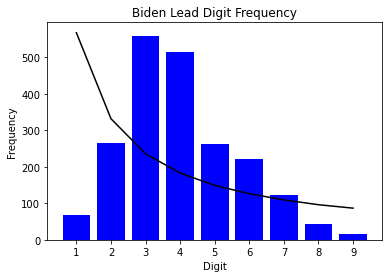


If you look at Biden's vote totals across the Chicago area, they do not match Benford's Law.



In [10]:
# --plot Biden's first digits--
df['Biden First Digit'] = df[d_column].apply(lambda x: first_digit(x)) # add a column to the dataframe using first_digit
d_count = df['Biden First Digit'].value_counts().to_dict()             # count frequency of each digit
plt.bar(d_count.keys(),d_count.values(),color='b')                     # plot
plt.title("Biden Lead Digit Frequency")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.xticks(df_bd['Digit'])
plt.plot(df_bd['Digit'],df_bd['Proportion']/100*max(df[v_column]), color='black') # overlay Benford's distribution
print()
plt.show()
print('\nIf you look at Biden\'s vote totals across the Chicago area, they do not match Benford\'s Law.\n')

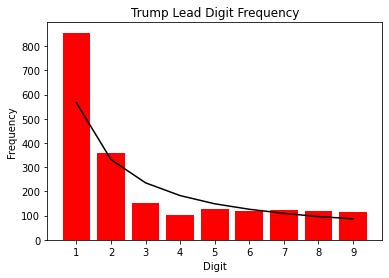


On the other hand, Trump's data looks like it does match Benford's Law.

And with that, we've successfully verified the initial premise of the video (and this specific claim of fraud to which it responds to).
Let's continue, and explore why Biden's data does not follow Benford's Law when Trump's seemingly does.
Trump's data offers some interesting results, as does Biden's.



In [11]:
# --plot Trump's first digits--
df['Trump First Digit'] = df[r_column].apply(lambda x: first_digit(x)) # same as before
r_count = df['Trump First Digit'].value_counts().to_dict()
plt.bar(r_count.keys(),r_count.values(),color='r')
plt.title("Trump Lead Digit Frequency")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.xticks(df_bd['Digit'])
plt.plot(df_bd['Digit'],df_bd['Proportion']/100*max(df[v_column]), color='black')
print()
plt.show()
print('\nOn the other hand, Trump\'s data looks like it does match Benford\'s Law.')
print('\nAnd with that, we\'ve successfully verified the initial premise of the video (and this specific claim of fraud to which it responds to).')
print('Let\'s continue, and explore why Biden\'s data does not follow Benford\'s Law when Trump\'s seemingly does.')
print('Trump\'s data offers some interesting results, as does Biden\'s.\n')

In [12]:
# --evaluate dataset--
precincts = len(df)
minvotes = min(df[v_column])
maxvotes = max(df[v_column])
avgvotes = np.mean(df[v_column])
stdvotes = np.std(df[v_column])
lessthan100votes = len(np.where(df[v_column] < 100)[0])
morethan1000votes = len(np.where(df[v_column] >= 1000)[0])
num3digit = len(np.where(df[v_column]/1000<1)[0])
percent3digit = num3digit/precincts*100
print('\nLet\'s look closely at the dataset.')
print('There are ' + str(precincts) + ' precincts.')
print('They\'re picked to have roughly the same size population each, and we can see that.')
print('According to the data we\'ve loaded:')
print('The smallest one, according to our data, had ' + str(minvotes) + ' votes.')
print('The biggest one, ' + str(maxvotes) + '.')
print('The average however, ' + str(int(avgvotes)) + '.')
print('The standard deviation, very tight! ' + str(int(stdvotes)) + '.')
print('There are only ' + str(lessthan100votes) + ' precincts with less than 100 votes,')
print('and only ' + str(morethan1000votes) + ' precincts that had 1000 or more votes,')
print('which means ' + str(num3digit) + ' or a massive ' + str(int(percent3digit)) + '% of precincts had three digit totals.')
print('\nThat\'s the opposite of "spanning multiple magnitudes."')
print('So it\'s actually not expected to get a Benford Distribution.\n')


Let's look closely at the dataset.
There are 2069 precincts.
They're picked to have roughly the same size population each, and we can see that.
According to the data we've loaded:
The smallest one, according to our data, had 39 votes.
The biggest one, 1884.
The average however, 550.
The standard deviation, very tight! 195.
There are only 6 precincts with less than 100 votes,
and only 46 precincts that had 1000 or more votes,
which means 2023 or a massive 97% of precincts had three digit totals.

That's the opposite of "spanning multiple magnitudes."
So it's actually not expected to get a Benford Distribution.



In [13]:
# --test against results from video--
print('\nThe test cases: How do our results compare to that of the YouTube video?')
print('We can take numbers cited in "Why do Biden\'s votes not follow Benford\'s Law?" as "expected" values and compare our own calculated values.\n')

test = {'Value': ['Precincts','Min votes','Max votes','Average votes','Standard deviation in votes','Precincts with < 100 votes','Precincts with >= 1000 votes','Precincts with three-digit vote totals','% of precincts with three-digit vote totals'],
        'Expected': [2069, 39, 1655, 516, 173, 7, 20, 2042, 98.7],
        'Actual': [precincts, minvotes, maxvotes, avgvotes, stdvotes, lessthan100votes, morethan1000votes, num3digit, percent3digit]
       }

test_df = pd.DataFrame(test, columns=['Value','Expected','Actual'])
test_df['Pass'] = test_df['Expected']==test_df['Actual']
print(test_df)

print('\nMany of these numbers do not match. We can redownload the data and examine it, but the results are the same.')
print('This does not necessarily mean the experiment is failed, some observations can be made:')
print('The passed test for number of precincts is a good sign; we certainly wouldn\'t expect that to change.')
print('The differences are not huge. Where they do differ, the value from our data is always higher than the "expected", '
      + 'with the exception of the number of precincts below 100 votes and '
      + 'the number/percentage of precincts with three-digit vote totals. '
      + 'As for those, a lower value actually represents the vote totals being higher anyway.')
print('\nThe conclusion: More votes have been counted. '
      + 'The video which our experiment is verifying was published on November 10th, just days after the election. '
     + 'Our data was downloaded again nearly a month later.\n')


The test cases: How do our results compare to that of the YouTube video?
We can take numbers cited in "Why do Biden's votes not follow Benford's Law?" as "expected" values and compare our own calculated values.

                                         Value  Expected       Actual   Pass
0                                    Precincts    2069.0  2069.000000   True
1                                    Min votes      39.0    39.000000   True
2                                    Max votes    1655.0  1884.000000  False
3                                Average votes     516.0   550.614790  False
4                  Standard deviation in votes     173.0   195.816018  False
5                   Precincts with < 100 votes       7.0     6.000000  False
6                 Precincts with >= 1000 votes      20.0    46.000000  False
7       Precincts with three-digit vote totals    2042.0  2023.000000  False
8  % of precincts with three-digit vote totals      98.7    97.776704  False

Many of these nu


While we're here...



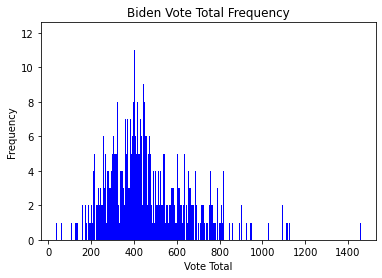

Here's a distribution of Biden's vote totals. As you can see, it's basically a normal distribution.
That's because Biden was the favorite in the Chicago area, so he got a consistent percentage of those three-digit precincts.
Take a look again at the Benford Distribution for Biden.


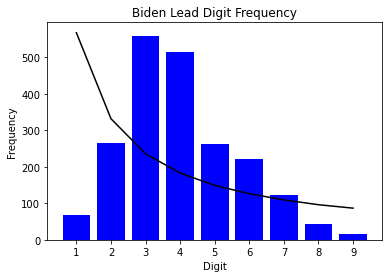

What you're looking at is a simplified version of the first distribution.



In [14]:
# --Biden vote total frequency--
print('\nWhile we\'re here...\n')
d_frequency = df[d_column].value_counts().to_dict()
plt.bar(d_frequency.keys(),d_frequency.values(),width=1,color='b')
plt.title("Biden Vote Total Frequency")
plt.xlabel("Vote Total")
plt.ylabel("Frequency")
plt.show()

print('Here\'s a distribution of Biden\'s vote totals. As you can see, it\'s basically a normal distribution.' )
print('That\'s because Biden was the favorite in the Chicago area, so he got a consistent percentage of those three-digit precincts.')
print('Take a look again at the Benford Distribution for Biden.')
plt.bar(d_count.keys(),d_count.values(),color='b')
plt.title("Biden Lead Digit Frequency")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.xticks(df_bd['Digit'])
plt.plot(df_bd['Digit'],df_bd['Proportion']/100*max(df[v_column]), color='black') # overlay Benford's distribution
plt.show()
print('What you\'re looking at is a simplified version of the first distribution.\n')


There is another method. You can look at the last digits and expect them to be roughly random. If not, that may be something to look into. Humans are bad at picking random numbers.


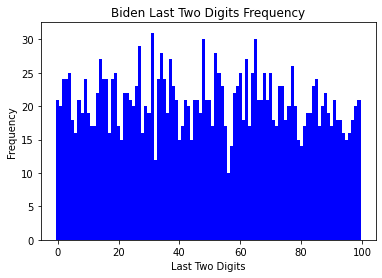

In [15]:
# --Biden frquency of last two digits--
print('\nThere is another method. You can look at the last digits and expect them to be roughly random. If not, that may be something to look into. Humans are bad at picking random numbers.')
d_last_2_column = 'Biden Last Two Digits'
df[d_last_2_column] = last_two_digits(df[d_column])
d_2_frequency = df[d_last_2_column].value_counts().to_dict()
plt.bar(d_2_frequency.keys(),d_2_frequency.values(),width=1,color='b')
plt.title("Biden Last Two Digits Frequency")
plt.xlabel("Last Two Digits")
plt.ylabel("Frequency")
plt.show()


Let's compare that last graph to actual random data.



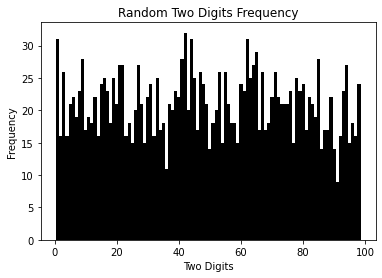

The last two digits of Biden's vote totals do, in fact, appear random.



In [16]:
# --frequency of random digit pairs--
print('\nLet\'s compare that last graph to actual random data.\n')
rand_2_column = 'Random Two Digits'
df[rand_2_column] = np.random.randint(1,99, size=len(df))
rand_2_frequency = df[rand_2_column].value_counts().to_dict()
plt.bar(rand_2_frequency.keys(),rand_2_frequency.values(),width=1,color='k')
plt.title("Random Two Digits Frequency")
plt.xlabel("Two Digits")
plt.ylabel("Frequency")
plt.show()

print('The last two digits of Biden\'s vote totals do, in fact, appear random.\n')


What about Trump?


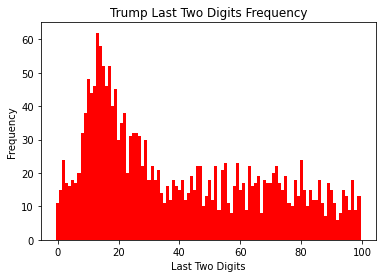


Woah! There's a tower...a...Trump tower?
It is a major deviation from what we would expect and therefore a cause for concern, possibly fraud. Or is it?



In [17]:
# --Trump frequency of last two digits--
print('\nWhat about Trump?')
r_last_2_column = 'Trump Last Two Digits'
df[r_last_2_column] = last_two_digits(df[r_column])
r_2_frequency = df[r_last_2_column].value_counts().to_dict()
plt.bar(r_2_frequency.keys(),r_2_frequency.values(),width=1,color='r')
plt.title("Trump Last Two Digits Frequency")
plt.xlabel("Last Two Digits")
plt.ylabel("Frequency")
plt.show()
print('\nWoah! There\'s a tower...a...Trump tower?')
print('It is a major deviation from what we would expect and therefore a cause for concern, possibly fraud. Or is it?\n')


Earlier we looked at the distribution of vote totals for Biden. As a reminder:


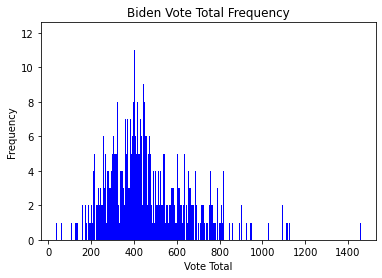


If we do the same for Trump, we get this.


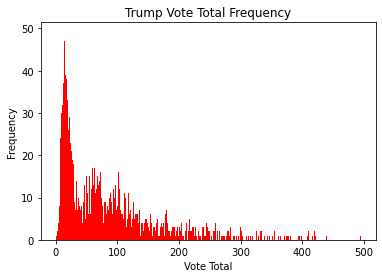

The majority of Trump's vote totals were only a two digit number.
So when we're looking at the "last two digits", in most cases, it's just the digits.
So we should not expect a random distribution. Once again, though at first something seems off, we are actually just looking at the data itself.



In [18]:
# --set up--
print('\nEarlier we looked at the distribution of vote totals for Biden. As a reminder:')
plt.bar(d_frequency.keys(),d_frequency.values(),width=1,color='b')
plt.title("Biden Vote Total Frequency")
plt.xlabel("Vote Total")
plt.ylabel("Frequency")
plt.show()
print()

# --Trump vote total frequency--
print('If we do the same for Trump, we get this.')
r_frequency = df[r_column].value_counts().to_dict()
plt.bar(r_frequency.keys(),r_frequency.values(),width=1,color='r')
plt.title("Trump Vote Total Frequency")
plt.xlabel("Vote Total")
plt.ylabel("Frequency")
plt.show()
print('The majority of Trump\'s vote totals were only a two digit number.')
print('So when we\'re looking at the "last two digits", in most cases, it\'s just the digits.')
print('So we should not expect a random distribution. Once again, though at first something seems off, we are actually just looking at the data itself.\n')

In [19]:
print('\nAnd that\'s the moral of the story. These tests can be an interesting way to spot that something might be wrong, but they do not guarantee that there is something wrong.')
print('You should take a closer look at the data, don\'t take someone\'s word for it, verify for yourself, double check.\n')


And that's the moral of the story. These tests can be an interesting way to spot that something might be wrong, but they do not guarentee that there is something wrong.
You should take a closer look at the data, don't take someone's word for it, verify for yourself, double check.



In [ ]:
print('\nFrom Benford\'s Law and the Detection of Election Fraud (2011):')
print('\n"Benford\'s Law is problematical at best as a forensic tool when applied to elections."')
print('\n"If a competitive two candidate race occurs in districts whose magnitude varies between 100 and 1000, the modal first digit for each candidate\'s vote will not be 1 of 2 but rather 4, 5, or 6."')
print('\n"It is not simply that the law occasional judges a fraudulent election fair or a fair election fraudulent. It\'s \'success rate\' either way is essentially equivalent to a toss of a coin, thereby rendering it problematical at best as a forensic tool and wholly misleading at worst."\n')